# **Latar Belakang**

SaaS adalah singkatan dari Software-as-a-Service, yaitu model penyediaan dan penjualan perangkat lunak di mana aplikasi di-hosting oleh pihak ketiga dan diberikan kepada pengguna melalui internet. Pelanggan dapat mengakses aplikasi melalui browser dan biasanya membayar biaya langganan bulanan untuk menggunakannya. AWS memperoleh pendapatan dari penjualan langganan software tersebut, di mana sebagian besar produknya ditawarkan dengan sistem berlangganan per bulan.

# **Pernyataan Masalah**

Perusahaan ini bergerak dalam model bisnis Software-as-a-Service (SaaS), dimana pendapatan berasal dari penjualan lisensi produk software kepada berbagai pelanggan di berbagai region dan segmen industri. Meskipun volume transaksi cukup besar, perusahaan menghadapi tantangan dalam mencapai profitabilitas yang optimal. 

Untuk itu, perusahaan membutuhkan seorang Data Analyst yang mampu melakukan analisis mendalam terhadap penjualan dan profitabilitas agar perusahaan dapat memahami faktor-faktor utama yang memengaruhi profit dan memperbaiki strategi bisnisnya.

Analisis ini akan berfokus pada beberapa pernyataan masalah berikut:

1. **Bagaimana hubungan antara tingkat diskon dan profitabilitas perusahaan?**  
   - Apakah penggunaan diskon justru menurunkan profit?  
   - Bagaimana pola pemberian diskon pada transaksi, dan apakah terdapat titik optimal?  

2. **Bagaimana tren penjualan dan profit dari waktu ke waktu?**  
   - Apakah terdapat pola musiman (seasonality) pada sales dan profit?  
   - Apakah pertumbuhan sales selalu diikuti oleh pertumbuhan profit?  

3. **Bagaimana performa produk terhadap profit di berbagai region?**  
   - Produk mana yang paling menguntungkan atau merugikan?  
   - Apakah ada produk tertentu yang rugi di region tertentu?  

4. **Bagaimana perbedaan profitabilitas antar segmen pelanggan?**  
   - Segmen pelanggan mana yang memberikan kontribusi profit terbesar?  
   - Apakah terdapat pelanggan atau segmen yang menghasilkan profit negatif?  

5. **Apakah terdapat pelanggan yang memberikan kontribusi besar atau justru merugikan perusahaan?**  
   - Siapa pelanggan top profit dan pelanggan dengan profit negatif?  
   - Bagaimana persebaran nilai pelanggan (customer value)? 


# **Pertanyaan Analitik**|

Berdasarkan pernyataan masalah yang telah dijelaskan sebelumnya, berikut adalah 
pertanyaan analitis utama yang akan dijawab melalui proses eksplorasi dan analisis data:

1. **Bagaimana tren penjualan dan profit perusahaan dari waktu ke waktu?**  
   - Apakah terdapat pola musiman (seasonality)?  
   - Apakah peningkatan penjualan selalu diikuti peningkatan profit?

2. **Region mana yang memberikan kontribusi sales dan profit terbesar?**  
   - Region mana yang memiliki profit margin paling tinggi?  
   - Apakah terdapat region yang mencatat profit negatif?

3. **Bagaimana performa profitabilitas antar segmen pelanggan (SMB, Enterprise, Strategic)?**  
   - Segmen mana yang paling menguntungkan?  
   - Apakah terdapat segmen yang memiliki margin rendah?

4. **Produk SaaS mana yang paling menguntungkan dan mana yang paling merugikan?**  
   - Apakah terdapat produk dengan sales tinggi tetapi profit margin sangat rendah?  
   - Bagaimana perbedaan performa produk di tiap region?

5. **Sejauh mana tingkat diskon memengaruhi profit dan profit margin perusahaan?**  
   - Apakah diskon meningkatkan penjualan namun menurunkan profit?  
   - Apakah ada korelasi antara diskon dan kerugian (profit negatif)?

6. **Bagaimana kontribusi masing-masing pelanggan terhadap profitabilitas perusahaan?**  
   - Siapa pelanggan yang memberikan profit terbesar?  
   - Apakah terdapat pelanggan yang menyebabkan kerugian?

Pertanyaan-pertanyaan ini menjadi dasar analisis untuk memahami faktor-faktor utama yang memengaruhi profitabilitas perusahaan dan menyusun strategi bisnis yang lebih efektif.


# **Data Preparation**


### **Import Library**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
base_dir = "D:\\Purwadhika\\Capstone\\Capstone 2\\"
path = base_dir + "SaaS-Sales.csv"
df = pd.read_csv(path)

### **Deskripsi Data**

1. **Row ID**        : angka unik setiap transaksi 
2. **Order ID**     : Order ID unik setiap pesanan 
3. **Order Date**   : tanggal pesanan dilakukan
4. **Date Key**     : representasi numerik dari Order Date (Year-Month-Date)
5. **Contact Name** : nama orang yg melakukan pesanan
6. **Country**      : negara yang pesan
7. **City**         : kota yang pesan
8. **Region**       : wilayah yang pesan
9. **Subregion**    : sub-wilayah yang pesan
10. **Customer**    : nama perusahaan yang pesan
11. **Customer ID** : kode unik setiap pelanggan
12. **Industry**    : industri perusahaan pemesan
13. **Segment**     : segmen pelanggan
14. **Product**     : produk yang dipesan
15. **License**    : nomor lisensi untuk produk yang dipesan
16. **Sales**       : jumlah total penjualan untuk transaksi
17. **Quantity**    : jumlah total item dalam transaksi
18. **Discount**    : diskon pada transaksi
19. **Profit**     : Keuntungan dari transaksi tersebut

In [3]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


### **Data Understanding & Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

**Insight**

pada dataset ini memiliki 3 tipe data float64 (Sales, Discount, Profit), 4 tipe data int64 (Row ID, Date Key, Customer ID, Quantity), dan 12 tipe data object untuk kolom kategorikal (Order ID, Order Date, Contact Name, Country, City, Region, Subregion, Customer, Industry, Segment, Product, License). 

In [5]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.duplicated().isna().sum()

np.int64(0)

In [7]:
df["Order ID"].duplicated().sum()

np.int64(4985)

In [8]:
df.nunique()

Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Insight**

nunique tiap kolom adalah:
- Row ID memiliki 9994
- Order ID memiliki 5009
- Order Date memiliki 1237
- Date Key memiliki 1237
- Contact Name memiliki 793
- Country memiliki 48
- City memiliki 262
- Region memiliki 3
- Subregion memiliki 12
- Customer memiliki 99
- Customer ID memiliki 99
- Industry memiliki 10
- Segment memiliki 3
- Product memiliki 14
- License memiliki 9994
- Sales memiliki 5825
- Quantity memiliki 14
- Discount memiliki 12
- Profit memiliki 7287



In [9]:
df.describe()[1:]

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


**Insight**

1. Sales 
    - Rata-rata transaksi sebesar $229.858 dengan standar deviasi yang tinggi menunjukkan variasi nilai transaksi sangat besar 
    - Transaksi terkecil sebanyak $444 dan terbesar $22.6 juta
2. Quantity 
    - Rata-rata 3.79 unit per transaksi dengan standar deviasi yang kecil
3. Discount
    - Rata-rata diskon 15.6%
    - Adanya diskon tinggi (80%) yang berpotensi merugikan
4. Profit
    - Rata-rata profit per transaksi $28.656 
    - Memiliki minimum profit yang sangat besar -$659.978 yang mengakibatkan kerugian 

**Mengonversi Order Date menjadi tipe DateTime sehingga dataframe di duplikat**

In [10]:
df_copy = df.copy()

In [11]:
df_copy["Order Date"] = pd.to_datetime(df_copy["Order Date"])

In [12]:
df_copy["Order Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

# **Exploratory Data Analysis (EDA)**

## A. Distribusi Variabel Utama
Analisis ini bertujuan untuk melihat pola distribusi Sales, Profit, Quantity, dan Discount, serta mendeteksi outlier yang mungkin memengaruhi perhitungan profit.


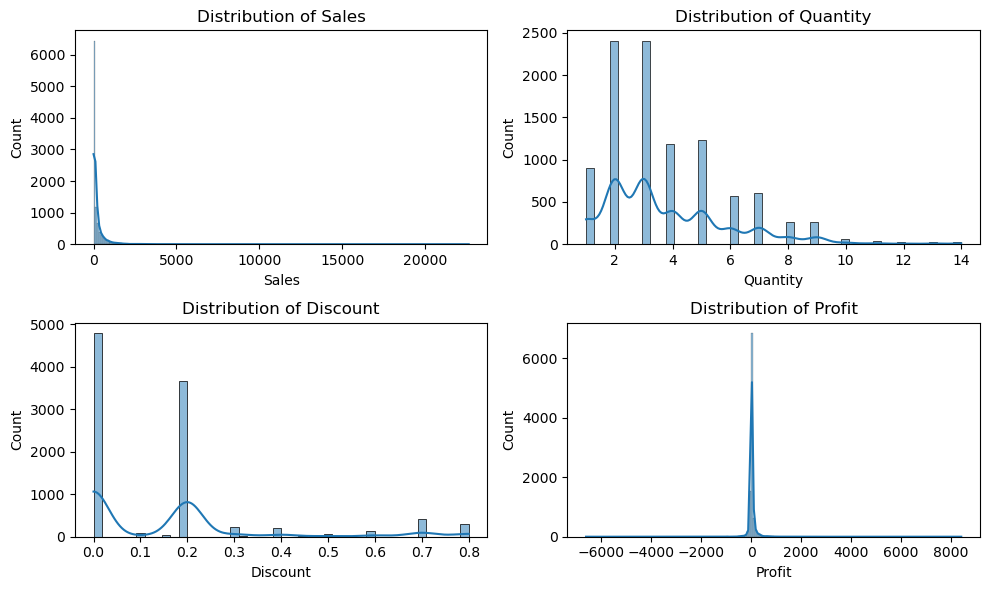

In [14]:
fig = plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.histplot(df_copy['Sales'], kde=True)
plt.title("Distribution of Sales")

plt.subplot(2,2,2)
sns.histplot(df_copy['Quantity'], kde=True)
plt.title("Distribution of Quantity")

plt.subplot(2,2,3)
sns.histplot(df_copy['Discount'], kde=True)
plt.title("Distribution of Discount")

plt.subplot(2,2,4)
sns.histplot(df_copy['Profit'], kde=True)
plt.title("Distribution of Profit")

plt.tight_layout()
plt.show()


**Insight**

Sales:
Distribusi right-skewed dengan mayoritas transaksi <$5000, namun ada outliers yang menunjukkan segmentasi pelanggan yang sangat beragam.​

Quantity:
Pola diskret dengan puncak di 2-3 unit per transaksi, mayoritas order skala kecil-sedang (≤5 unit).

Discount:
Distribusi bimodal dengan puncak di 0% (no discount) dan 20% (standard discount), menunjukkan dua strategi pricing berbeda. Discount hingga 80% perlu dievaluasi dampaknya terhadap profit.​

Profit:
Distribusi terlihat simetris dengan puncak di $0-$2000, namun terdapat outliers ekstrem di kedua sisi (kerugian besar dan profit sangat tinggi).​

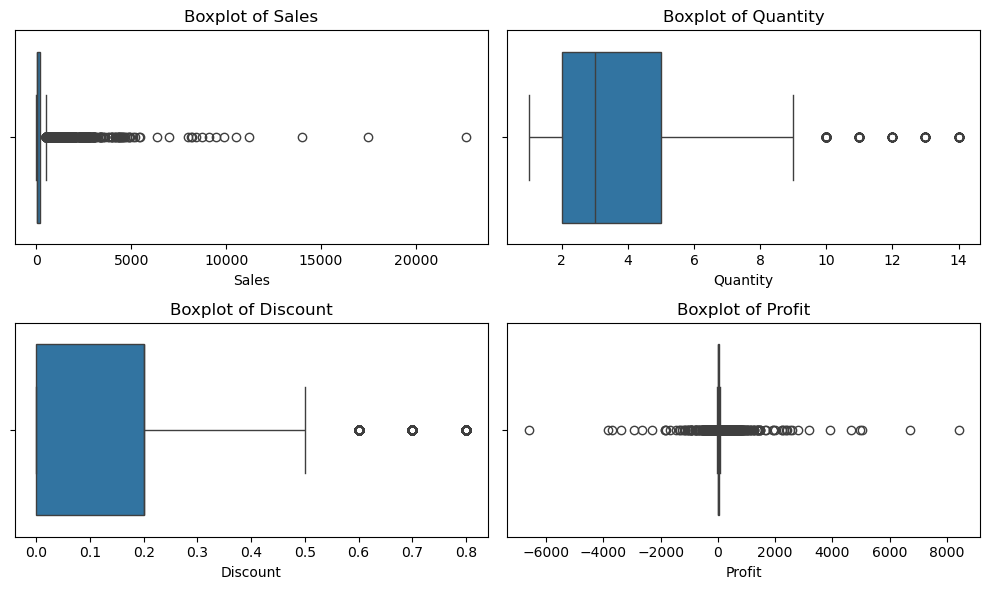

In [15]:
fig = plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.boxplot(x=df_copy['Sales'])
plt.title("Boxplot of Sales")

plt.subplot(2,2,2)
sns.boxplot(x=df_copy['Quantity'])
plt.title("Boxplot of Quantity")

plt.subplot(2,2,3)
sns.boxplot(x=df_copy['Discount'])
plt.title("Boxplot of Discount")

plt.subplot(2,2,4)
sns.boxplot(x=df_copy['Profit'])
plt.title("Boxplot of Profit")

plt.tight_layout()
plt.show()

**Insight**

Sales:
Boxplot menunjukkan banyak outliers ekstrem di atas Q3, dengan median sangat rendah mendekati Q1, menunjukkan distribusi right-skewed dengan sebagian kecil transaksi bernilai sangat tinggi.​

Quantity:
Distribusi quantity di rentang 2-5 unit, namun terdapat beberapa outliers di 10-14 unit.​

Discount:
Box menunjukkan 75% data berada di range 0-20% (Q1-Q3), dengan outliers signifikan di 60-80%.

Profit:
Boxplot profit menampilkan distribusi yang terlihat simetris dengan median mendekati nol, namun terdapat banyak outliers di kedua sisi terutama profit negatif (kerugian besar) dan profit sangat tinggi.

## B. Tren Penjualan dan Profit per Kuartal

Bagian ini menganalisis bagaimana perubahan Sales dan Profit dari waktu ke waktu.

Tujuannya adalah untuk:
- mengidentifikasi pola musiman,
- melihat pertumbuhan penjualan,
- mengevaluasi apakah peningkatan sales diikuti peningkatan profit.


In [16]:
df_copy["Year"] = df_copy["Order Date"].dt.year
df_copy["Month"] = df_copy["Order Date"].dt.month
df_copy["Quarter"] = df_copy["Order Date"].dt.to_period("Q").astype(str)

In [17]:
quarterly_sales = (
    df_copy.groupby("Quarter")["Sales"]
    .sum()
    .reset_index()
)
quarterly_sales


,Quarter,Sales
0,2020Q1,74447.7960
1,2020Q2,86538.7596
2,2020Q3,143633.2123
3,2020Q4,179627.7302
4,2021Q1,68851.7386
5,2021Q2,89124.1870
6,2021Q3,130259.5752
7,2021Q4,182297.0082
8,2022Q1,92596.4190
9,2022Q2,135370.1130


In [18]:
quarterly_profit = (
    df_copy.groupby("Quarter")["Profit"]
    .sum()
    .reset_index()
)
quarterly_profit


,Quarter,Profit
0,2020Q1,3811.2290
1,2020Q2,11204.0692
2,2020Q3,12804.7218
3,2020Q4,21723.9541
4,2021Q1,9264.9416
5,2021Q2,12190.9224
6,2021Q3,16853.6194
7,2021Q4,23309.1203
8,2022Q1,11446.3415
9,2022Q2,16084.9055


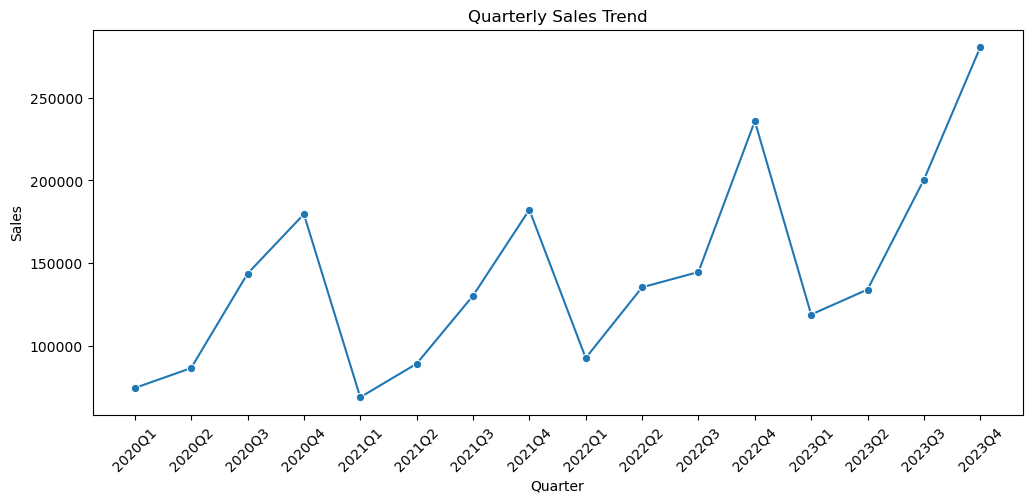

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(data=quarterly_sales, x="Quarter", y="Sales", marker="o")
plt.xticks(rotation=45)
plt.title("Quarterly Sales Trend")
plt.show()


- Secara umum, tren penjualan meningkat dari tahun 2020 hingga 2023, menunjukkan pertumbuhan yang stabil pada bisnis SaaS ini.
- Pola kuartalan terlihat konsisten: penurunan tajam di Q1 setiap tahun, kemudian diikuti kenaikan kuat menuju Q3–Q4.
- Q4 selalu menjadi puncak penjualan di setiap tahun, dengan lonjakan terbesar terjadi pada 2023 Q4, menunjukkan adanya pola musiman: peningkatan kebutuhan layanan menjelang akhir tahun.
- Tahun 2023 menunjukkan performa terbaik, terutama pada Q3–Q4, yang menandakan ekspansi penjualan yang signifikan dibanding tahun-tahun sebelumnya.

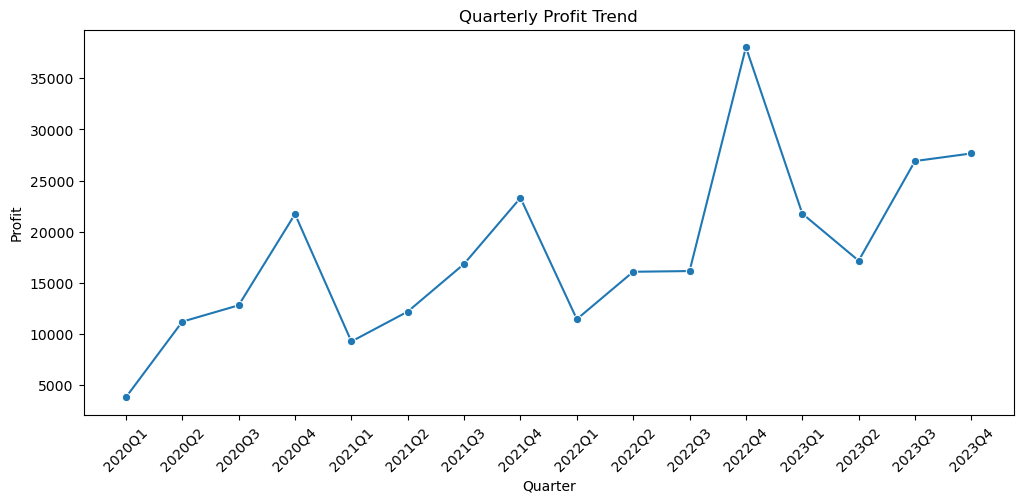

In [20]:
plt.figure(figsize=(12,5))
sns.lineplot(data=quarterly_profit, x="Quarter", y="Profit", marker="o")
plt.xticks(rotation=45)
plt.title("Quarterly Profit Trend")
plt.show()


**Insight**

Grafik menunjukkan pola musiman yang konsisten dengan Q4 sebagai puncak penjualan setiap tahun (2020 Q4: $180K, 2021 Q4: $183K, 2022 Q4: $234K, 2023 Q4: $276K), mengindikasikan periode end-of-year adalah waktu terbaik untuk sales

## C. Korelasi Discount, Sales, Profit, dan Quantity

Korelasi dianalisis untuk memahami hubungan antar variabel utama:

- Discount vs Sales  
- Discount vs Profit  
- Sales vs Profit  
- Quantity vs Sales/Profit

Metode yang digunakan: Spearman (karena data tidak berdistribusi normal).


In [21]:
from scipy.stats import spearmanr

In [22]:
corr_discount_sales, p_ds = spearmanr(df_copy['Discount'], df_copy['Sales'])
corr_discount_profit, p_dp = spearmanr(df_copy['Discount'], df_copy['Profit'])
corr_sales_profit, p_sp = spearmanr(df_copy['Sales'], df_copy['Profit'])
corr_quantity_sales, p_qs = spearmanr(df_copy['Quantity'], df_copy['Sales'])
corr_quantity_profit, p_qp = spearmanr(df_copy['Quantity'], df_copy['Profit'])

## Hipotesis Uji Korelasi Spearman

| Variabel | H₀ (Hipotesis Nol) | H₁ (Hipotesis Alternatif) |
|----------|-------------------|---------------------------|
| Discount vs Sales | Tidak ada korelasi | Ada korelasi |
| Discount vs Profit | Tidak ada korelasi | Ada korelasi |
| Sales vs Profit | Tidak ada korelasi | Ada korelasi |
| Quantity vs Sales | Tidak ada korelasi | Ada korelasi |
| Quantity vs Profit | Tidak ada korelasi | Ada korelasi |

**Tingkat signifikansi (α):** 0.05


In [23]:
print("Hasil Korelasi Spearman:")

print(f"Discount vs Sales: {corr_discount_sales:.4f} (p-value: {p_ds:.4f})")
print(f"Discount vs Profit: {corr_discount_profit:.4f} (p-value: {p_dp:.4f})")
print(f"Sales vs Profit: {corr_sales_profit:.4f} (p-value: {p_sp:.4f})")
print(f"Quantity vs Sales: {corr_quantity_sales:.4f} (p-value: {p_qs:.4f})")
print(f"Quantity vs Profit: {corr_quantity_profit:.4f} (p-value: {p_qp:.4f})")

Hasil Korelasi Spearman:
Discount vs Sales: -0.0570 (p-value: 0.0000)
Discount vs Profit: -0.5434 (p-value: 0.0000)
Sales vs Profit: 0.5184 (p-value: 0.0000)
Quantity vs Sales: 0.3274 (p-value: 0.0000)
Quantity vs Profit: 0.2345 (p-value: 0.0000)


**Insight**

- Discount vs Sales: Korelasi sangat lemah yaitu -0.0570 (p-value: 0.0000), artinya pemberian diskon hampir tidak berpengaruh terhadap kenaikan sales, meskipun signifikan secara statistik.​
- Discount vs Profit: Korelasi negatif sedang yaitu -0.5434 (p-value: 0.0000), menandakan semakin besar diskon, profit cenderung menurun secara signifikan.​
- Sales vs Profit: Korelasi positif sedang sebesar 0.5184 (p-value: 0.0000), artinya kenaikan sales umumnya diikuti kenaikan profit dengan hubungan yang cukup kuat.​
- Quantity vs Sales: Korelasi positif lemah yaitu 0.3274 (p-value: 0.0000), menunjukkan quantity order punya pengaruh terbatas terhadap total sales.​
- Quantity vs Profit: Korelasi positif sangat lemah yaitu 0.2345 (p-value: 0.0000), sehingga peningkatan quantity hanya sedikit berdampak pada profit

In [24]:
correlation_data = {
    'Variable Pair': ['Discount vs Sales', 'Discount vs Profit', 
                      'Sales vs Profit', 'Quantity vs Sales', 'Quantity vs Profit'],
    'Correlation': [corr_discount_sales, corr_discount_profit, 
                    corr_sales_profit, corr_quantity_sales, corr_quantity_profit]
}
corr_df = pd.DataFrame(correlation_data)

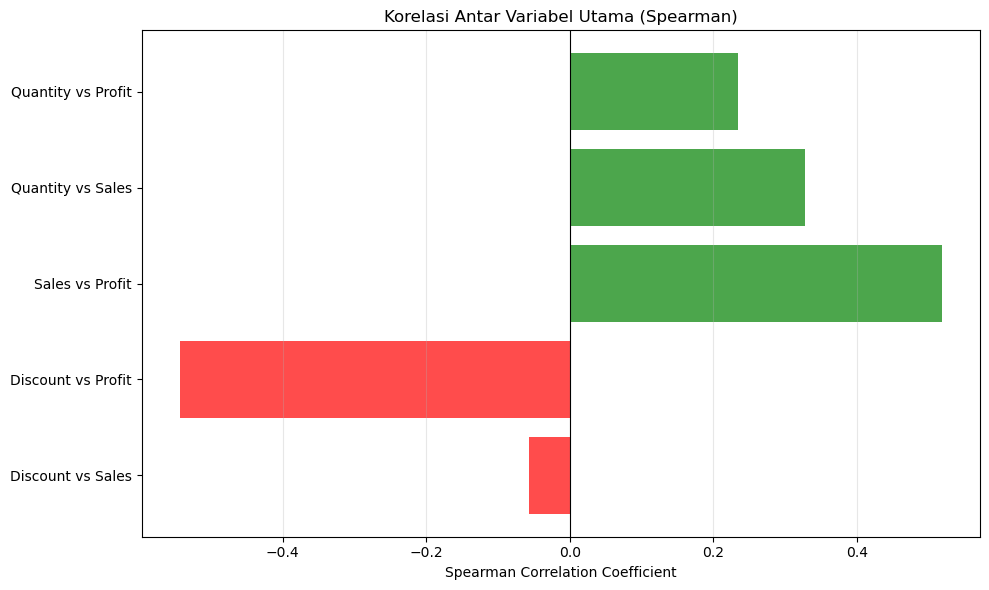

In [25]:
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in corr_df['Correlation']]
plt.barh(corr_df['Variable Pair'], corr_df['Correlation'], color=colors, alpha=0.7)
plt.xlabel('Spearman Correlation Coefficient')
plt.title('Korelasi Antar Variabel Utama (Spearman)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**

- Korelasi paling kuat adalah antara sales dan profit yang artinya peningkatan sales cukup sejalan dengan kenaikan profit.​
- Quantity punya pengaruh positif tapi lebih rendah ke sales dan profit.​
- Korelasi discount ke profit bersifat negatif sedang, artinya diskon tinggi sangat menurunkan profit.​
- Discount vs sales punya korelasi negatif sangat lemah, menandakan pemberian diskon tidak meningkatkan sales secara signifikan.

In [26]:
df_copy['Discount_Band'] = pd.cut(
    df_copy['Discount'], 
    bins=[-0.01, 0, 0.2, 0.4, 0.6, 1.0],
    labels=['No Discount', '1-20%', '21-40%', '41-60%', '>60%']
)


discount_dist = df_copy['Discount_Band'].value_counts().sort_index().reset_index()
discount_dist.columns = ['Discount_Band', 'Count']
display(discount_dist)
print("\n")

,Discount_Band,Count
0,No Discount,4798
1,1-20%,3803
2,21-40%,460
3,41-60%,215
4,>60%,718


In [27]:
discount_analysis = df_copy.groupby('Discount_Band', observed=False).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Row ID': 'count'
}).rename(columns={'Row ID': 'Transaction_Count'}).reset_index()

discount_analysis['Profit_Margin'] = (
    discount_analysis['Profit'] / discount_analysis['Sales']
)

print("Profitabilitas per Discount Band:")
display(discount_analysis)

Profitabilitas per Discount Band:


,Discount_Band,Sales,Profit,Transaction_Count,Profit_Margin
0,No Discount,1.087908e+06,320987.6032,4798,0.295050
1,1-20%,8.465222e+05,100785.4745,3803,0.119058
2,21-40%,2.341379e+05,-35817.4655,460,-0.152976
3,41-60%,7.104821e+04,-28944.1944,215,-0.407388
4,>60%,5.758404e+04,-70614.3961,718,-1.226284


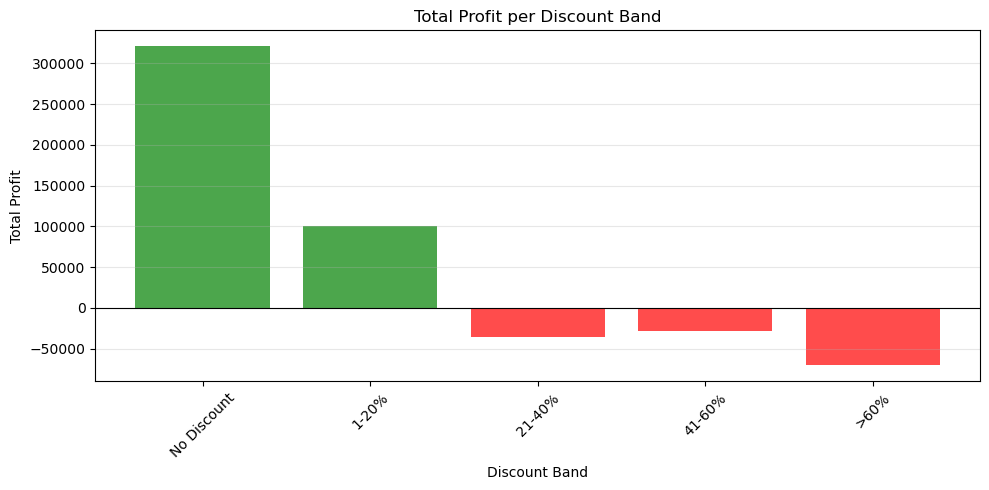

In [28]:
plt.figure(figsize=(10, 5))
colors = ['green' if x > 0 else 'red' for x in discount_analysis['Profit']]
plt.bar(discount_analysis['Discount_Band'], discount_analysis['Profit'], color=colors, alpha=0.7)
plt.title('Total Profit per Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**

- Band No Discount menghasilkan total profit terbesar, menjadi kontributor utama profit perusahaan.
- Band diskon 1–20% masih memberikan profit positif, sehingga masih tergolong diskon yang sehat.​
- Mulai band 21–40%, total profit berubah menjadi negatif, menandakan diskon di atas 20% mulai merugikan.​
- Band 41–60% memperburuk kerugian.​
- Band >60% adalah yang paling merugikan dengan total profit, menunjukkan diskon sangat tinggi sama sekali tidak sustainable bagi bisnis.

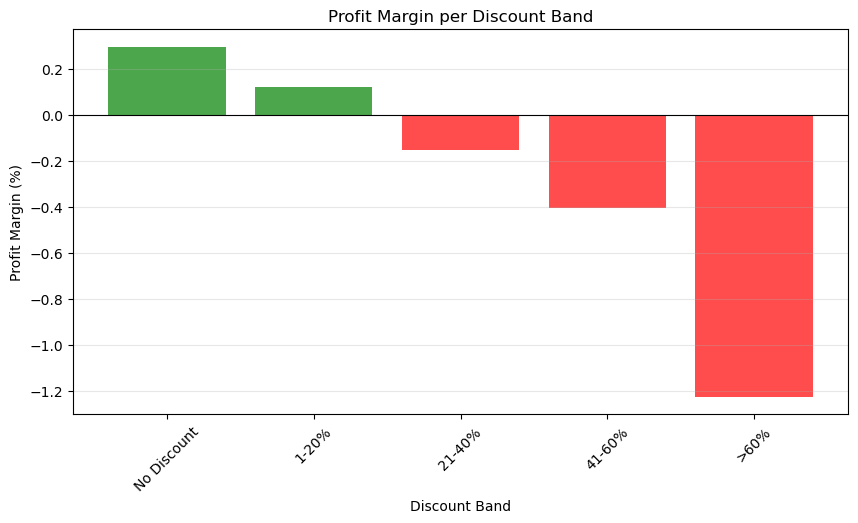

In [29]:
plt.figure(figsize=(10, 5))
colors = ['green' if x > 0 else 'red' for x in discount_analysis['Profit_Margin']]
plt.bar(discount_analysis['Discount_Band'], discount_analysis['Profit_Margin'], color=colors, alpha=0.7)
plt.title('Profit Margin per Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)

plt.show()

**Insight**

- Band No Discount punya profit margin tertinggi sekitar, menunjukkan transaksi tanpa diskon paling sehat secara profitabilitas.​
- Band 1–20% masih menghasilkan profit margin positif, sehingga diskon ringan ini masih aman bagi bisnis.​
- Mulai band 21–40%, profit margin turun, artinya diskon di atas 20% sudah membuat transaksi rata-rata rugi.​
- Band 41–60% makin tidak sehat, menunjukkan hampir 40% dari nilai penjualan hilang sebagai kerugian.​
- Band >60% paling berbahaya, berarti kerugian yang ditanggung bahkan lebih besar daripada nilai sales-nya sendiri.

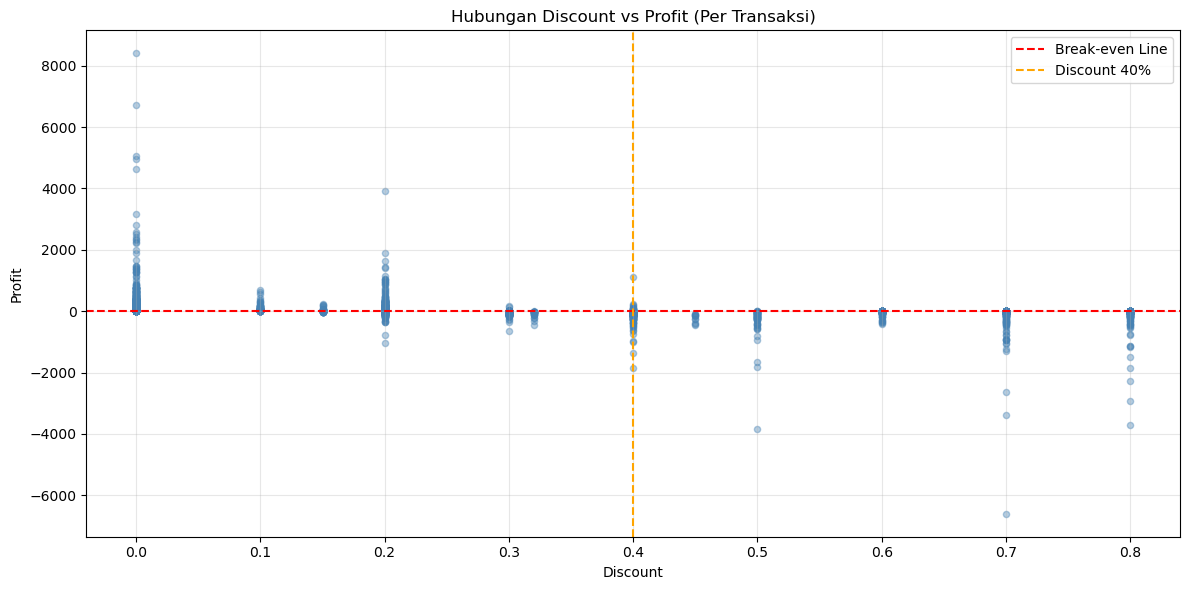

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(df_copy['Discount'], df_copy['Profit'], alpha=0.4, s=20, c='steelblue')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Hubungan Discount vs Profit (Per Transaksi)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Break-even Line')
plt.axvline(x=0.4, color='orange', linestyle='--', linewidth=1.5, label='Discount 40%')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**

- Titik-titik di sisi kiri (diskon 0–20%) didominasi profit positif di atas garis, artinya sebagian besar transaksi dengan diskon rendah masih menguntungkan.​
- Mulai sekitar diskon 30–40%, banyak titik turun ke bawah garis nol, menunjukkan semakin sering terjadi transaksi rugi.​
- Di atas 40% hampir semua titik berada di area negatif, mengindikasikan diskon tinggi hampir selalu menghasilkan kerugian per transaksi.​
- Pola ini memperjelas bahwa ada tipping point di sekitar 40% discount, di mana strategi diskon berubah dari masih bisa diterima menjadi sangat merusak profit.

In [31]:
product_discount = df_copy.groupby('Product').agg({
    'Discount': 'mean',
    'Profit': 'sum',
    'Row ID': 'count'
}).rename(columns={'Row ID': 'Transaction_Count', 'Discount': 'Avg_Discount'}).reset_index()

product_discount['Avg_Discount_Pct'] = product_discount['Avg_Discount'] * 100
product_discount = product_discount.sort_values('Avg_Discount', ascending=False)

print("\nProduk dengan Rata-rata Diskon Tertinggi:")
display(product_discount[['Product', 'Avg_Discount_Pct', 'Profit', 'Transaction_Count']].head(10))


Produk dengan Rata-rata Diskon Tertinggi:


,Product,Avg_Discount_Pct,Profit,Transaction_Count
3,ContactMatcher,35.306732,12496.2822,1842
1,Big Ol Database,30.608696,3384.7569,115
6,Marketing Suite,21.114035,-3472.5560,228
8,OneView,16.652361,18138.0054,466
0,Alchemy,16.176471,55617.8249,68
11,Site Analytics,15.455568,44515.7306,889
9,SaaS Connector Pack,13.834901,13059.1436,957
5,FinanceHub,13.251784,32136.4203,981
12,Storage,8.202765,949.5182,217
10,SaaS Connector Pack - Gold,8.031496,6964.1767,254


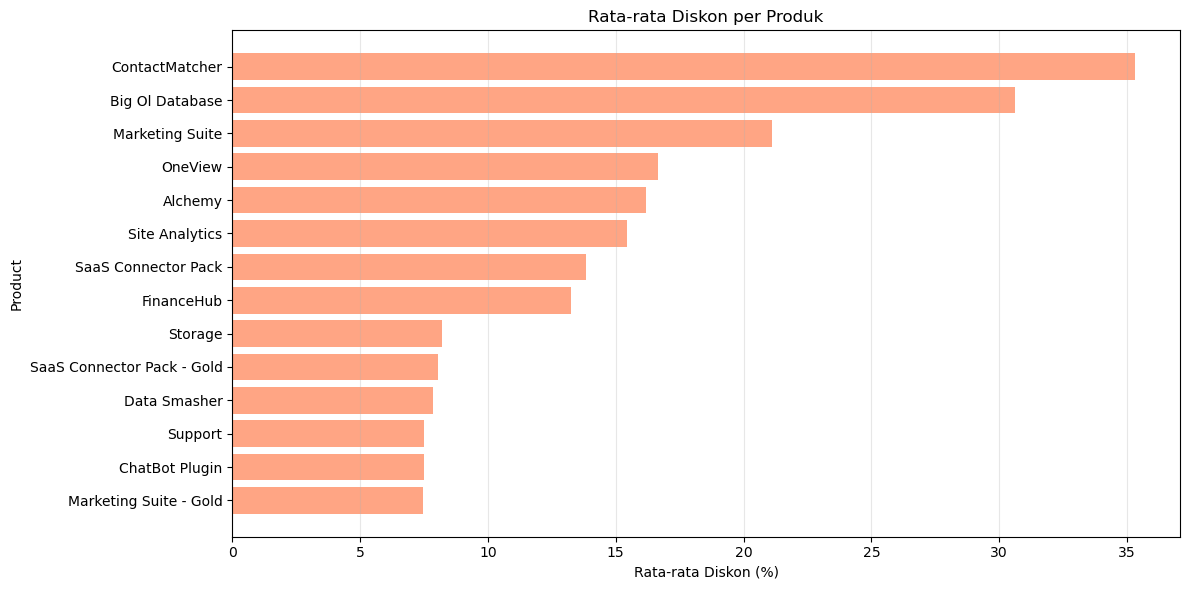

In [32]:
plt.figure(figsize=(12, 6))
plt.barh(product_discount['Product'], product_discount['Avg_Discount_Pct'], color='coral', alpha=0.7)
plt.xlabel('Rata-rata Diskon (%)')
plt.ylabel('Product')
plt.title('Rata-rata Diskon per Produk')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**

- Produk dengan rata-rata diskon tertinggi adalah ContactMatcher, disusul Big Ol Database (~30.5%) dan Marketing Suite (~21%).​
- Produk lain seperti OneView, Alchemy, dan Site Analytics berada di kisaran diskon sedang (15–17%), masih relatif lebih terkendali dibanding tiga teratas.​
- Kelompok produk seperti Storage, SaaS Connector Pack - Gold, Data Smasher, Support, ChatBot Plugin, dan Marketing Suite - Gold hanya mendapat diskon rata-rata sekitar 7–8%, sehingga kebijakan diskonnya jauh lebih konservatif.​
- Secara keseluruhan, terlihat ada beberapa produk inti yang “dimanjakan” dengan diskon tinggi, yang kemungkinan besar berkontribusi pada penurunan profit di analisis sebelumnya.

# **Analisis Profitabilitas per Region**

Analisis ini mencakup:

- Total Sales per Region  
- Total Profit per Region  
- Profit Margin per Region  
- Ranking region berdasarkan profit  

Tujuannya adalah melihat region mana yang memberikan kontribusi terbaik dan region mana yang perlu evaluasi lebih lanjut.


In [33]:
region_perf = df_copy.groupby("Region")[["Sales", "Profit"]].sum().reset_index()
region_perf

,Region,Sales,Profit
0,AMER,8.378496e+05,127426.9898
1,APJ,4.154642e+05,11513.9869
2,EMEA,1.043887e+06,147456.0450


In [34]:
region_perf["Profit_Margin"] = region_perf["Profit"] / region_perf["Sales"]
region_perf

,Region,Sales,Profit,Profit_Margin
0,AMER,8.378496e+05,127426.9898,0.152088
1,APJ,4.154642e+05,11513.9869,0.027714
2,EMEA,1.043887e+06,147456.0450,0.141257


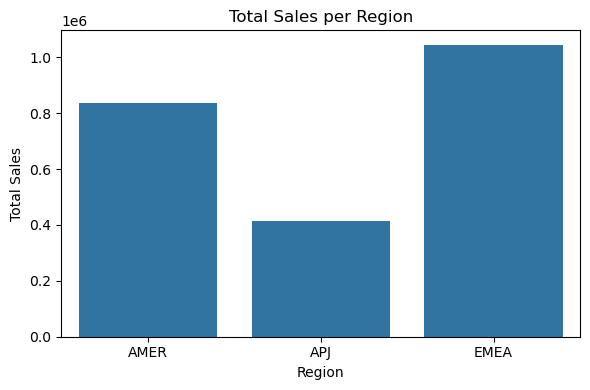

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Sales", data=region_perf)
plt.title("Total Sales per Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

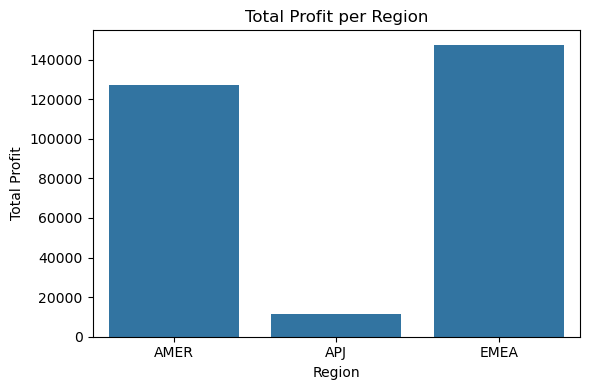

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Profit", data=region_perf)
plt.title("Total Profit per Region")
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


**Insight**

Grafik menunjukkan bahwa EMEA adalah kontributor terbesar baik dari sisi sales maupun profit, diikuti AMER. Sementara itu, APJ tertinggal jauh dengan total sales dan profit, sehingga meskipun semua region masih mencetak profit positif, kinerja APJ relatif paling lemah baik dari sisi volume penjualan maupun profit yang dihasilkan.

# **Analisis Profitabilitas per Customer Segment**

Melihat performa berdasarkan segmen pelanggan (SMB, Enterprise, Strategic) melalui:

- Total Sales  
- Total Profit  
- Profit Margin  

Tujuannya adalah menentukan segmen pelanggan yang paling potensial.


In [37]:
segment_perf = df_copy.groupby("Segment")[["Sales","Profit"]].sum().reset_index()
segment_perf

,Segment,Sales,Profit
0,Enterprise,4.296531e+05,60298.6785
1,SMB,1.161401e+06,134119.2092
2,Strategic,7.061464e+05,91979.1340


In [38]:
segment_perf["Profit_Margin"] = segment_perf["Profit"] / segment_perf["Sales"]
segment_perf


,Segment,Sales,Profit,Profit_Margin
0,Enterprise,4.296531e+05,60298.6785,0.140343
1,SMB,1.161401e+06,134119.2092,0.115481
2,Strategic,7.061464e+05,91979.1340,0.130255


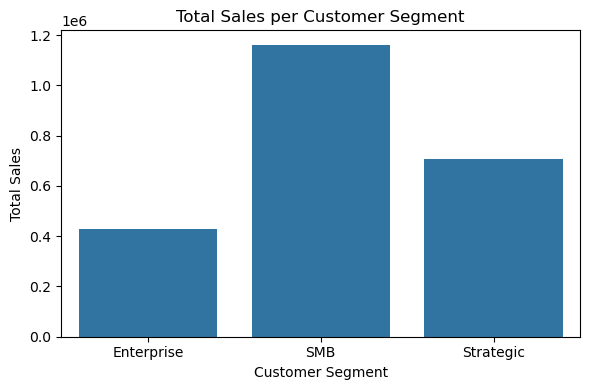

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x="Segment", y="Sales", data=segment_perf)
plt.title("Total Sales per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


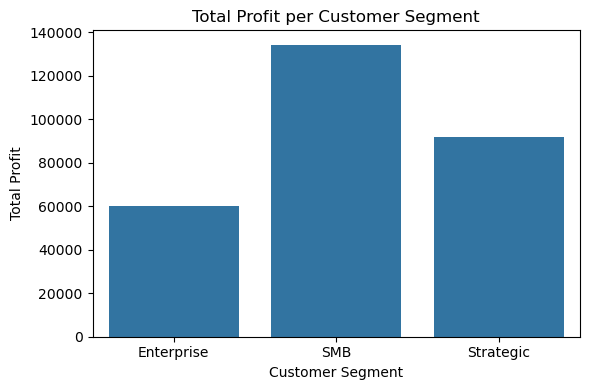

In [40]:
plt.figure(figsize=(6,4))
sns.barplot(x="Segment", y="Profit", data=segment_perf)
plt.title("Total Profit per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


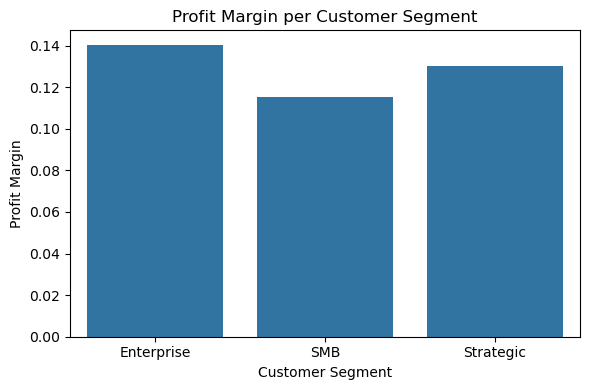

In [41]:
plt.figure(figsize=(6,4))
sns.barplot(x="Segment", y="Profit_Margin", data=segment_perf)
plt.title("Profit Margin per Customer Segment")
plt.ylabel("Profit Margin")
plt.xlabel("Customer Segment")
plt.tight_layout()
plt.show()



**Insight**

Segment SMB menyumbang total sales dan total profit terbesar, namun profit marginnya justru paling rendah sekitar dibanding segmen lain. Segmen Enterprise menghasilkan sales paling kecil tetapi memiliki profit margin tertinggi, sedangkan segmen Strategic berada di tengah, sehingga kombinasi volume dan margin menjadikannya kontributor kedua terbesar terhadap profit keseluruhan.

# **Customer-Level Profit Analysis**

Analisis lebih mendalam terhadap masing-masing pelanggan:

- Top 10 customers by profit  
- Top 10 customers by sales  
- Customers dengan profit negatif  

Tujuannya adalah mengetahui kontribusi pelanggan dan mengidentifikasi pelanggan yang menyebabkan kerugian.


In [42]:
product_perf = df_copy.groupby("Product")[["Sales", "Profit"]].sum().reset_index()
product_perf


,Product,Sales,Profit
0,Alchemy,149528.0300,55617.8249
1,Big Ol Database,189238.6310,3384.7569
2,ChatBot Plugin,27118.7920,6527.7870
3,ContactMatcher,410378.2650,12496.2822
4,Data Smasher,167380.3180,41936.6357
5,FinanceHub,340935.4150,32136.4203
6,Marketing Suite,114879.9963,-3472.5560
7,Marketing Suite - Gold,223843.6080,21278.8264
8,OneView,107532.1610,18138.0054
9,SaaS Connector Pack,91705.1640,13059.1436


In [43]:
product_perf["Profit_Margin"] = product_perf["Profit"] / product_perf["Sales"]
product_perf


,Product,Sales,Profit,Profit_Margin
0,Alchemy,149528.0300,55617.8249,0.371956
1,Big Ol Database,189238.6310,3384.7569,0.017886
2,ChatBot Plugin,27118.7920,6527.7870,0.240711
3,ContactMatcher,410378.2650,12496.2822,0.030451
4,Data Smasher,167380.3180,41936.6357,0.250547
5,FinanceHub,340935.4150,32136.4203,0.094260
6,Marketing Suite,114879.9963,-3472.5560,-0.030228
7,Marketing Suite - Gold,223843.6080,21278.8264,0.095061
8,OneView,107532.1610,18138.0054,0.168675
9,SaaS Connector Pack,91705.1640,13059.1436,0.142404


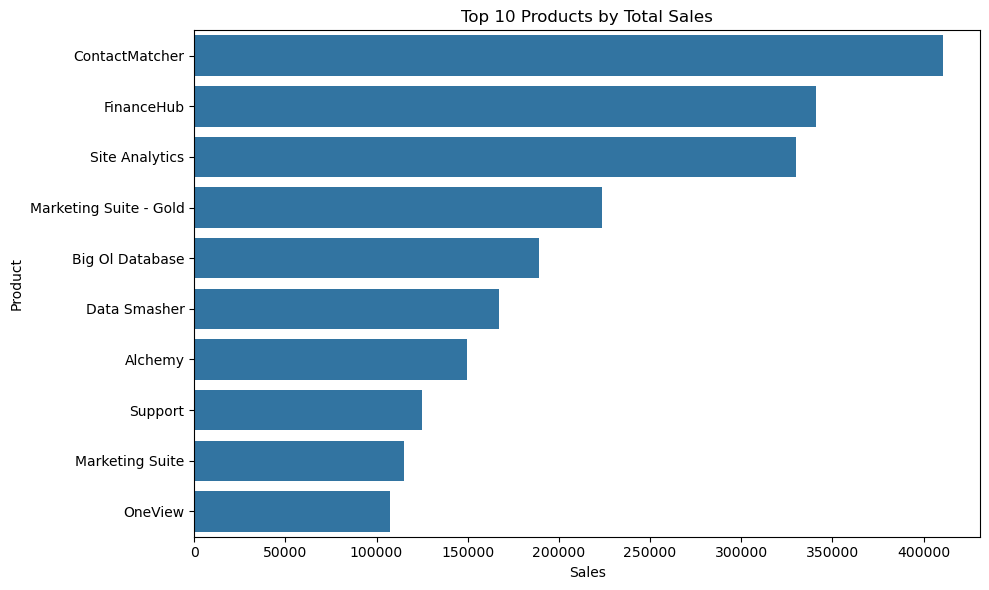

In [44]:
top_sales = product_perf.sort_values(by="Sales", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_sales, y="Product", x="Sales", orient="h")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


**Insight**

Grafik ini menunjukkan bahwa ContactMatcher adalah penyumbang sales tertinggi, diikuti FinanceHub dan Site Analytics, sedangkan produk lain di top 10 berada di rentang 100K–230K sales.

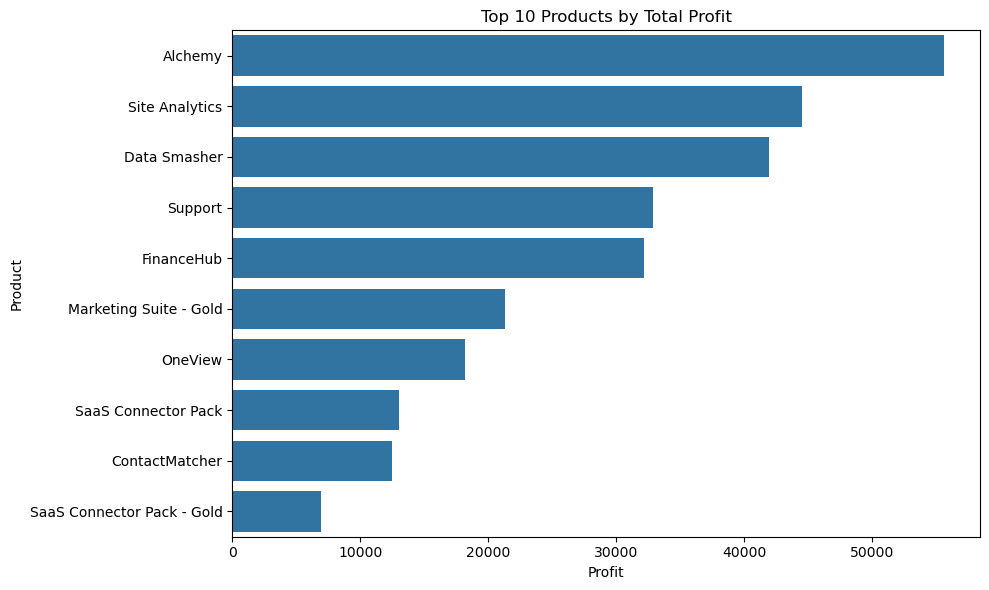

In [45]:
top_profit = product_perf.sort_values(by="Profit", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_profit, y="Product", x="Profit", orient="h")
plt.title("Top 10 Products by Total Profit")
plt.xlabel("Profit")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


**Insight**

- Produk paling menguntungkan adalah Alchemy dengan total profit tertinggi, diikuti Site Analytics dan Data Smasher.​

- Produk seperti Support, FinanceHub, dan Marketing Suite - Gold berada di middle tier, masih menjadi kontributor penting.​

Di ujung bawah top 10, SaaS Connector Pack, ContactMatcher, dan SaaS Connector Pack - Gold menyumbang profit lebih kecil, sehingga bukan driver utama profit meskipun tetap positif.​

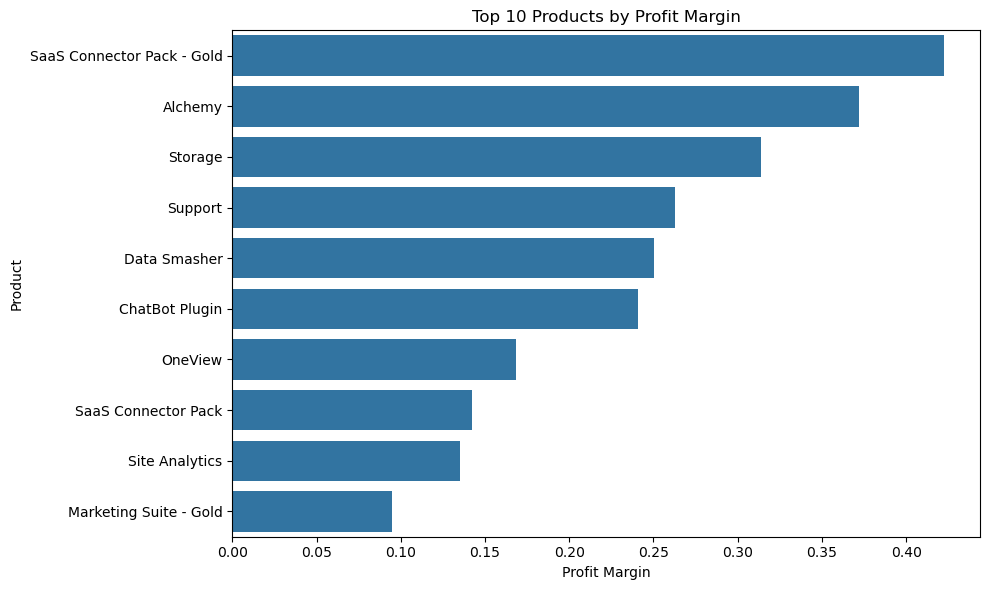

In [46]:
top_margin = product_perf.sort_values(by="Profit_Margin", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_margin, y="Product", x="Profit_Margin", orient="h")
plt.title("Top 10 Products by Profit Margin")
plt.xlabel("Profit Margin")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


**Insight**

- Produk dengan profit margin tertinggi adalah SaaS Connector Pack - Gold, diikuti Alchemy dan Storage, sehingga ketiganya sangat efisien mengonversi sales menjadi profit.​
- Produk seperti Support, Data Smasher, dan ChatBot Plugin masih memiliki margin sehat di kisaran 25%.​
- Di ujung bawah daftar, SaaS Connector Pack, Site Analytics, dan terutama Marketing Suite - Gold punya margin lebih rendah, sehingga meskipun mungkin tetap menguntungkan, kontribusi profit per dolar sales-nya tidak sebaik produk lain di chart ini.

# **Analisis Profitabilitas per Produk**

Meliputi:

- Total Sales per product  
- Total Profit per product  
- Profit Margin per product  
- Top & bottom products  

Tujuan tahap ini adalah memahami produk mana yang paling menguntungkan dan yang perlu diperbaiki.


In [47]:
# Profitabilitas per Produk
product_perf = df_copy.groupby("Product")[["Sales", "Profit"]].sum().reset_index()

# Hitung Profit Margin
product_perf["Profit_Margin"] = product_perf["Profit"] / product_perf["Sales"]

product_perf.head()


,Product,Sales,Profit,Profit_Margin
0,Alchemy,149528.030,55617.8249,0.371956
1,Big Ol Database,189238.631,3384.7569,0.017886
2,ChatBot Plugin,27118.792,6527.7870,0.240711
3,ContactMatcher,410378.265,12496.2822,0.030451
4,Data Smasher,167380.318,41936.6357,0.250547


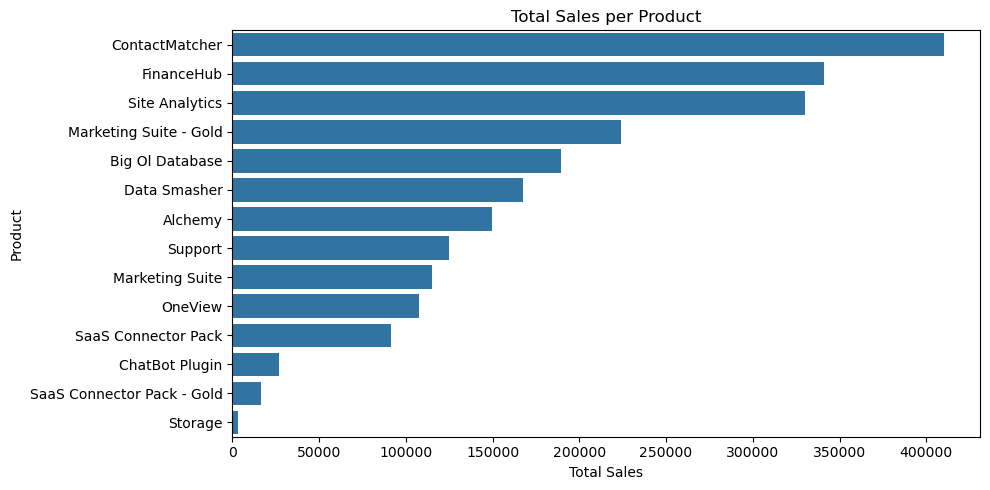

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_perf.sort_values("Sales", ascending=False),
            x="Sales", y="Product")
plt.title("Total Sales per Product")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


**Insight**

Grafik ini menunjukkan bahwa ContactMatcher adalah produk dengan total sales tertinggi, diikuti FinanceHub dan Site Analytics, sehingga ketiganya menjadi driver utama revenue. Di sisi lain, produk seperti SaaS Connector Pack, ChatBot Plugin, SaaS Connector Pack - Gold, dan terutama Storage memiliki total sales jauh lebih rendah (<100K), sehingga kontribusi mereka terhadap pendapatan keseluruhan relatif kecil dibandingkan produk-produk di atasnya.

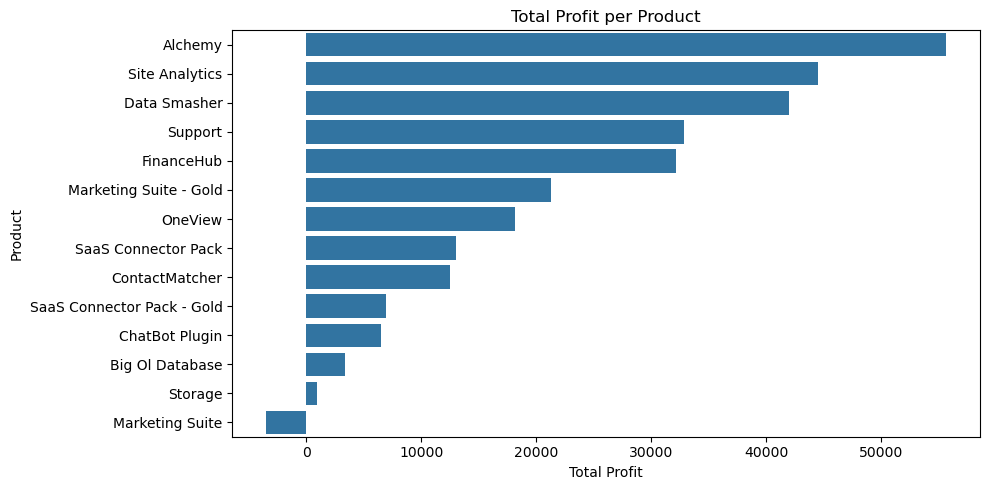

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_perf.sort_values("Profit", ascending=False),
            x="Profit", y="Product")
plt.title("Total Profit per Product")
plt.xlabel("Total Profit")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


**Insight**

Grafik ini menunjukkan bahwa Alchemy adalah produk dengan total profit terbesar, diikuti Site Analytics dan Data Smasher, sehingga ketiganya menjadi kontributor utama profit perusahaan. Di sisi lain, produk seperti Big Ol Database, Storage, dan terutama Marketing Suite menghasilkan profit sangat kecil bahkan negatif (Marketing Suite berada di sisi kiri nol), menandakan bahwa beberapa produk high-sales sebelumnya ternyata kurang menguntungkan atau merugi jika dilihat dari sisi profit.​

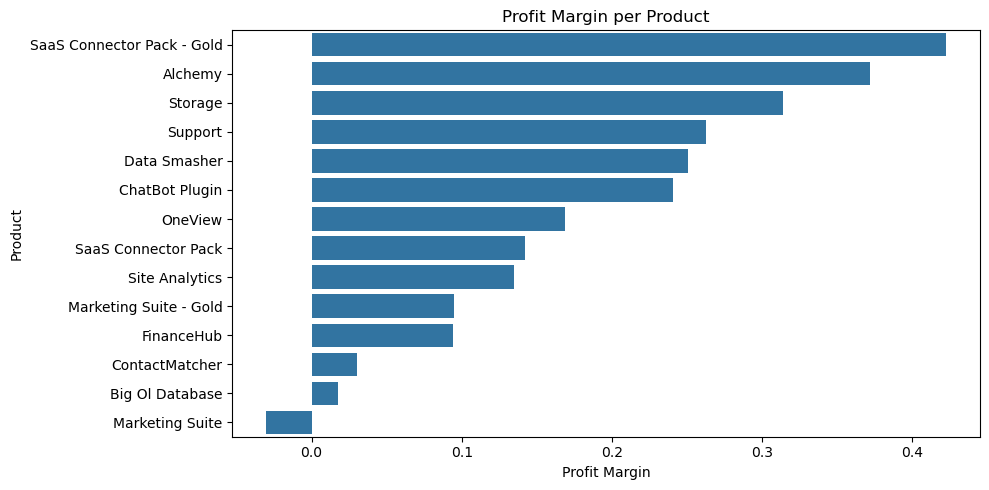

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_perf.sort_values("Profit_Margin", ascending=False),
            x="Profit_Margin", y="Product")
plt.title("Profit Margin per Product")
plt.xlabel("Profit Margin")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


**Insight**

Grafik ini menunjukkan bahwa SaaS Connector Pack - Gold memiliki profit margin tertinggi, diikuti Alchemy dan Storage, sehingga tiga produk ini paling efisien mengubah sales menjadi profit. Produk seperti Support, Data Smasher, dan ChatBot Plugin juga masih memiliki margin sehat di kisaran 25%, sementara Marketing Suite, Big Ol Database, dan ContactMatcher berada di ujung bawah dengan margin sangat rendah sehingga berisiko tidak memberikan imbal hasil yang sebanding dengan effort penjualannya.​

In [51]:
top_profit_products = product_perf.sort_values("Profit", ascending=False).head(5)
top_profit_products


,Product,Sales,Profit,Profit_Margin
0,Alchemy,149528.030,55617.8249,0.371956
11,Site Analytics,330007.054,44515.7306,0.134893
4,Data Smasher,167380.318,41936.6357,0.250547
13,Support,125152.744,32864.4698,0.262595
5,FinanceHub,340935.415,32136.4203,0.094260


In [52]:
bottom_profit_products = product_perf.sort_values("Profit").head(5)
bottom_profit_products


,Product,Sales,Profit,Profit_Margin
6,Marketing Suite,114879.9963,-3472.5560,-0.030228
12,Storage,3024.2800,949.5182,0.313965
1,Big Ol Database,189238.6310,3384.7569,0.017886
2,ChatBot Plugin,27118.7920,6527.7870,0.240711
10,SaaS Connector Pack - Gold,16476.4020,6964.1767,0.422676


In [53]:
top_margin_products = product_perf.sort_values("Profit_Margin", ascending=False).head(5)
top_margin_products


,Product,Sales,Profit,Profit_Margin
10,SaaS Connector Pack - Gold,16476.402,6964.1767,0.422676
0,Alchemy,149528.030,55617.8249,0.371956
12,Storage,3024.280,949.5182,0.313965
13,Support,125152.744,32864.4698,0.262595
4,Data Smasher,167380.318,41936.6357,0.250547


In [54]:
bottom_margin_products = product_perf.sort_values("Profit_Margin").head(5)
bottom_margin_products


,Product,Sales,Profit,Profit_Margin
6,Marketing Suite,114879.9963,-3472.5560,-0.030228
1,Big Ol Database,189238.6310,3384.7569,0.017886
3,ContactMatcher,410378.2650,12496.2822,0.030451
5,FinanceHub,340935.4150,32136.4203,0.094260
7,Marketing Suite - Gold,223843.6080,21278.8264,0.095061


# **Profit per Produk per Region**

Heatmap digunakan untuk:

- Menemukan produk yang hanya merugi di region tertentu  
- Menemukan region yang tidak cocok untuk produk tertentu  
- Memperkuat rekomendasi pricing dan strategi regional


In [55]:
product_region_profit = df_copy.pivot_table(
    index="Product",
    columns="Region",
    values="Profit",
    aggfunc="sum"
).fillna(0)

product_region_profit

Region,AMER,APJ,EMEA
Product,,,
Alchemy,18264.2564,17819.8729,19533.6956
Big Ol Database,-4369.3768,-2077.9085,9832.0422
ChatBot Plugin,2698.8127,1122.5064,2706.4679
ContactMatcher,26663.9591,-21583.6618,7415.9849
Data Smasher,19152.0253,4244.7980,18539.8124
FinanceHub,9255.0745,1652.3162,21229.0296
Marketing Suite,52.7756,-1895.6634,-1629.6682
Marketing Suite - Gold,10364.8535,2718.0106,8195.9623
OneView,10613.2993,-5270.8407,12795.5468


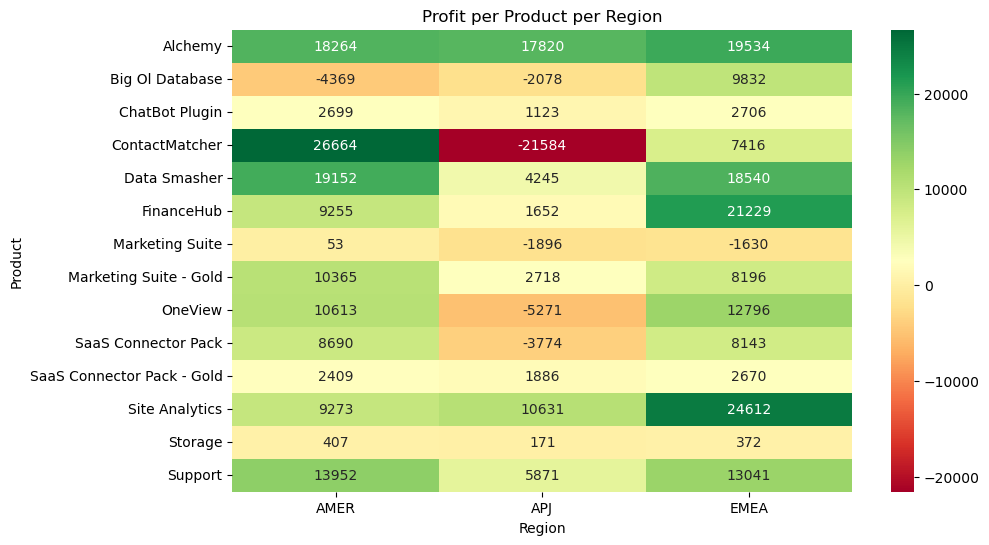

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(product_region_profit, annot=True, fmt=".0f", cmap="RdYlGn")
plt.title("Profit per Product per Region")
plt.ylabel("Product")
plt.xlabel("Region")
plt.show()


**Insight**

- Heatmap ini menunjukkan bahwa hampir semua produk paling menguntungkan di EMEA, dengan contoh kuat seperti Site Analytics (≈24.6K), Data Smasher (≈18.5K), dan FinanceHub (≈21.2K) yang mencatat profit tinggi di region tersebut.​

- Di AMER, sebagian besar produk juga memberikan profit positif yang besar, misalnya ContactMatcher (≈26.7K), Alchemy (≈18.3K), dan Data Smasher (≈19.2K), menjadikan AMER dan EMEA sebagai dua region utama penggerak profit.​

- Sebaliknya, APJ terlihat jauh lebih lemah, dengan beberapa produk mencatat kerugian signifikan seperti ContactMatcher (≈-21.6K), Big Ol Database (≈-2.1K), dan SaaS Connector Pack (≈-3.8K), sehingga region ini menjadi sumber utama negative profit untuk beberapa produk kunci.

# **Customer Value Segmentation (Opsional)**

Pelanggan dikelompokkan berdasarkan total sales menjadi:

- High Value Customer  
- Low Value Customer  

Tujuannya adalah memahami penyebaran nilai pelanggan untuk mendukung strategi CRM.


In [57]:
customer_summary = df_copy.groupby('Customer').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Row ID': 'count'
}).rename(columns={'Row ID': 'Transaction_Count'}).reset_index()

# Hitung profit margin
customer_summary['Profit_Margin'] = (
    customer_summary['Profit'] / customer_summary['Sales']
)

# Lihat overview
print("Overview Customer Summary:")
print(f"Total Customers: {len(customer_summary)}")
print(f"Total Sales: ${customer_summary['Sales'].sum():,.2f}")
print(f"Total Profit: ${customer_summary['Profit'].sum():,.2f}")
print("\n")

Overview Customer Summary:
Total Customers: 99
Total Sales: $2,297,200.86
Total Profit: $286,397.02




In [58]:
top10_customers = customer_summary.nlargest(10, 'Profit')

print("TOP 10 CUSTOMERS BY PROFIT:")
display(top10_customers[['Customer', 'Sales', 'Profit', 'Profit_Margin', 'Transaction_Count']])
print(f"\nKontribusi Top 10: ${top10_customers['Profit'].sum():,.2f} ({(top10_customers['Profit'].sum()/customer_summary['Profit'].sum()*100):.2f}% dari total profit)")
print("\n")

TOP 10 CUSTOMERS BY PROFIT:


,Customer,Sales,Profit,Profit_Margin,Transaction_Count
92,Valero Energy,41220.4188,10308.6297,0.250086,105
28,Coca-Cola,28643.8040,9449.0246,0.329880,81
88,Trafigura Group,33447.1270,8867.8252,0.265130,103
62,Mondelez International,32993.0458,8577.6524,0.259984,143
55,Lowes,40360.1630,7937.4915,0.196666,110
56,Lukoil,35199.1830,7117.0922,0.202195,116
80,Siemens,36008.3686,6519.5105,0.181055,170
16,Bank of America Corp.,41255.9471,6449.8554,0.156338,132
54,Kroger,29783.4590,6256.1005,0.210053,135
10,Anthem,55719.2100,5953.2038,0.106843,134



Kontribusi Top 10: $77,436.39 (27.04% dari total profit)




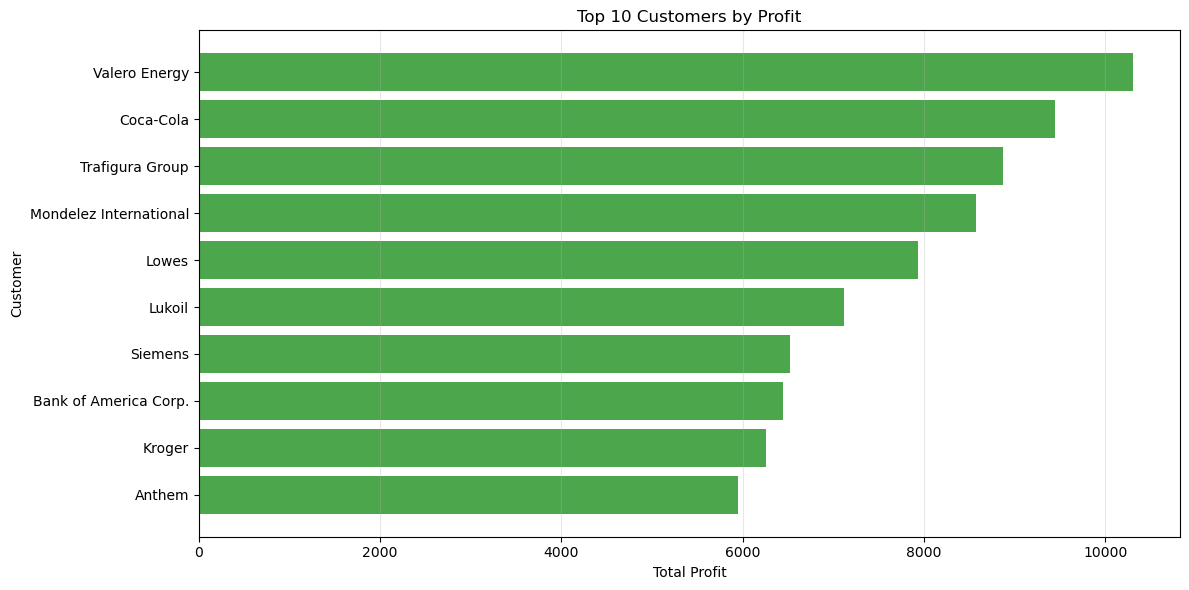

In [59]:
plt.figure(figsize=(12, 6))
plt.barh(top10_customers['Customer'], top10_customers['Profit'], color='green', alpha=0.7)
plt.xlabel('Total Profit')
plt.ylabel('Customer')
plt.title('Top 10 Customers by Profit')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**

Grafik ini menunjukkan bahwa Valero Energy adalah customer paling menguntungkan, diikuti Coca-Cola dan Trafigura Group. Deretan berikutnya seperti Mondelez International, Lowes, dan Lukoil masih menyumbang profit tinggi, sedangkan Siemens, Bank of America Corp., Kroger, dan Anthem melengkapi top 10 dengan profit sehingga keseluruhan chart menegaskan adanya sekelompok key accounts yang menjadi kontributor utama profit perusahaan.

In [60]:
negative_profit_customers = customer_summary[customer_summary['Profit'] < 0].sort_values('Profit')

print(f"CUSTOMERS DENGAN PROFIT NEGATIF: {len(negative_profit_customers)} customers")

if len(negative_profit_customers) > 0:
    print("\nTOP 10 WORST CUSTOMERS (Profit Negatif):")
    display(negative_profit_customers.head(10)[['Customer', 'Sales', 'Profit', 'Profit_Margin', 'Transaction_Count']])
    
    total_loss = negative_profit_customers['Profit'].sum()
    print(f"\nTotal Loss dari Customers Negatif: ${total_loss:,.2f}")
    print(f"Persentase dari Total Profit: {(abs(total_loss)/customer_summary['Profit'].sum()*100):.2f}%")
else:
    print("Tidak ada customer dengan profit negatif")

print("\n")

CUSTOMERS DENGAN PROFIT NEGATIF: 10 customers

TOP 10 WORST CUSTOMERS (Profit Negatif):


,Customer,Sales,Profit,Profit_Margin,Transaction_Count
5,Allstate,39941.6400,-2796.2935,-0.070009,105
19,Bosch,25444.9990,-1823.7794,-0.071675,119
66,Nissan Motor,22650.8206,-1585.1886,-0.069984,70
31,Costco Wholesale,21796.7020,-1354.8547,-0.062159,62
95,Walgreens,14420.6190,-740.6747,-0.051362,68
82,Sprint Nextel,18852.0750,-462.6587,-0.024542,101
63,Morgan Stanley,28631.4500,-361.8099,-0.012637,126
46,HonHai Precision Industry,18457.4150,-136.6992,-0.007406,88
44,HSBC Holdings,22703.8405,-104.4022,-0.004598,83
39,Gazprom,5402.9020,-13.9695,-0.002586,53



Total Loss dari Customers Negatif: $-9,380.33
Persentase dari Total Profit: 3.28%




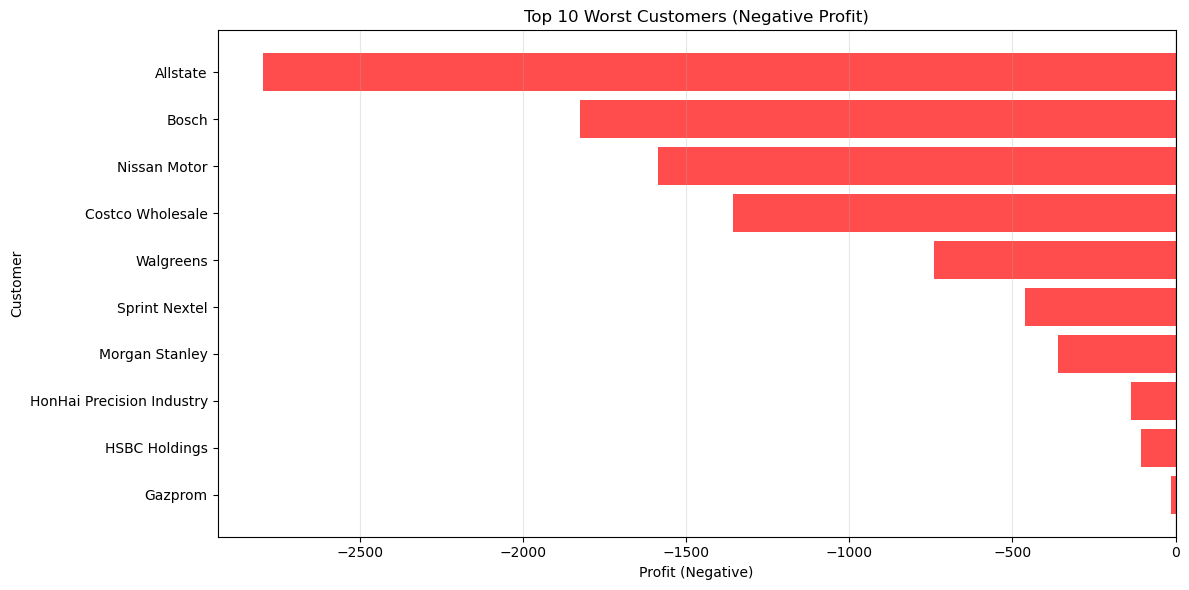

In [61]:
if len(negative_profit_customers) > 0:
    bottom10 = negative_profit_customers.head(10)
    
    plt.figure(figsize=(12, 6))
    plt.barh(bottom10['Customer'], bottom10['Profit'], color='red', alpha=0.7)
    plt.xlabel('Profit (Negative)')
    plt.ylabel('Customer')
    plt.title('Top 10 Worst Customers (Negative Profit)')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada customer dengan profit negatif untuk divisualisasikan")

**Insight**

Grafik ini menunjukkan bahwa Allstate adalah customer paling merugikan, diikuti Bosch, Nissan Motor, dan Costco Wholesale yang semuanya menghasilkan kerugian signifikan bagi perusahaan. Customer lain seperti Walgreens, Sprint Nextel, Morgan Stanley, HonHai Precision Industry, HSBC Holdings, dan Gazprom juga memberi profit negatif namun dengan nilai kerugian yang lebih kecil  sehingga keseluruhan chart ini mengidentifikasi 10 akun yang perlu dievaluasi ulang terkait pricing, diskon, atau kelayakan hubungan bisnisnya.

In [62]:
top10_sales = customer_summary.nlargest(10, 'Sales')

print("TOP 10 CUSTOMERS BY SALES:")
display(top10_sales[['Customer', 'Sales', 'Profit', 'Profit_Margin', 'Transaction_Count']])
print("\n")

TOP 10 CUSTOMERS BY SALES:


,Customer,Sales,Profit,Profit_Margin,Transaction_Count
10,Anthem,55719.2100,5953.2038,0.106843,134
38,Ford Motor,43893.0424,4010.7662,0.091376,176
4,Allianz,42904.1670,5531.8834,0.128936,192
16,Bank of America Corp.,41255.9471,6449.8554,0.156338,132
92,Valero Energy,41220.4188,10308.6297,0.250086,105
55,Lowes,40360.1630,7937.4915,0.196666,110
89,Tyson Foods,40326.3440,1690.5775,0.041922,184
5,Allstate,39941.6400,-2796.2935,-0.070009,105
9,AmerisourceBergen,39234.7610,4202.8824,0.107121,149
13,BMW,39083.7900,5948.0993,0.152188,111


**Insight**

- Top 10 customers by sales mencakup perusahaan seperti Anthem, Ford Motor, Allianz, Bank of America Corp., Valero Energy, Lowes, Tyson Foods, Allstate, AmerisourceBergen, dan BMW dengan total sales sekitar 39K–56K per customer.

- Sebagian besar customer ini juga menghasilkan profit positif dengan profit margin bervariasi (sekitar 4–25%), namun Allstate menonjol sebagai anomali karena memiliki sales tinggi (≈39.9K) tetapi profit negatif (≈‑2.8K, margin ‑7%), sehingga perlu dievaluasi ulang strategi harga/diskonnya.

In [63]:
# Set customer top 10 by sales dan top 10 by profit
top_sales_customers = set(top10_sales['Customer'])
top_profit_customers = set(top10_customers['Customer'])

# Irisannya dan selisihnya
overlap = top_sales_customers.intersection(top_profit_customers)
only_sales = top_sales_customers - top_profit_customers
only_profit = top_profit_customers - top_sales_customers

print("ANALISIS: Top Sales vs Top Profit")
print("=" * 80)
print(f"Customer yang masuk Top 10 Sales dan Top 10 Profit : {len(overlap)}")
print(f"Customer yang hanya masuk Top 10 Sales            : {len(only_sales)}")
print(f"Customer yang hanya masuk Top 10 Profit           : {len(only_profit)}")

# Daftar customer sales tinggi tapi tidak termasuk top profit
if len(only_sales) > 0:
    print("\nCustomers dengan Sales tinggi tetapi TIDAK masuk Top 10 Profit:")
    high_sales_low_profit = customer_summary[
        customer_summary['Customer'].isin(only_sales)
    ][['Customer', 'Sales', 'Profit', 'Profit_Margin']]
    display(high_sales_low_profit.sort_values('Sales', ascending=False))

print()


ANALISIS: Top Sales vs Top Profit
Customer yang masuk Top 10 Sales dan Top 10 Profit : 4
Customer yang hanya masuk Top 10 Sales            : 6
Customer yang hanya masuk Top 10 Profit           : 6

Customers dengan Sales tinggi tetapi TIDAK masuk Top 10 Profit:


,Customer,Sales,Profit,Profit_Margin
38,Ford Motor,43893.0424,4010.7662,0.091376
4,Allianz,42904.1670,5531.8834,0.128936
89,Tyson Foods,40326.3440,1690.5775,0.041922
5,Allstate,39941.6400,-2796.2935,-0.070009
9,AmerisourceBergen,39234.7610,4202.8824,0.107121
13,BMW,39083.7900,5948.0993,0.152188


**Insight**

- Tidak semua customer dengan sales tertinggi otomatis menjadi penyumbang profit terbesar; terdapat beberapa customer yang masuk Top 10 Sales tetapi tidak masuk Top 10 Profit, artinya mereka memberikan volume besar namun profit margin rendah atau bahkan negatif.

- Daftar customers high‑sales‑low‑profit ini sebaiknya menjadi prioritas evaluasi (penyesuaian diskon, harga, atau kontrak), sedangkan customers yang overlap di Top 10 Sales dan Top 10 Profit adalah kandidat untuk dipertahankan dan mungkin di‑upsell.​

In [64]:
median_sales = customer_summary["Sales"].median()
median_sales


22650.8206

In [65]:
customer_summary.loc[
    customer_summary["Sales"] > median_sales,
    "Value_Segment"
] = "High Value"

customer_summary.loc[
    customer_summary["Sales"] <= median_sales,
    "Value_Segment"
] = "Low Value"


In [66]:
customer_summary.head(10)


,Customer,Sales,Profit,Transaction_Count,Profit_Margin,Value_Segment
0,AT&T,29462.3240,4520.6641,151,0.153439,High Value
1,Abbott Laboratories,12617.1140,2281.7391,67,0.180845,Low Value
2,Aetna,27278.5930,3312.6698,153,0.121438,High Value
3,Airbus,29798.5930,5593.3657,123,0.187706,High Value
4,Allianz,42904.1670,5531.8834,192,0.128936,High Value
5,Allstate,39941.6400,-2796.2935,105,-0.070009,High Value
6,Alphabet,16116.4610,3980.3457,44,0.246974,Low Value
7,Amazon,23189.2165,2163.9843,134,0.093319,High Value
8,American Express,33514.9210,5436.2589,137,0.162204,High Value
9,AmerisourceBergen,39234.7610,4202.8824,149,0.107121,High Value


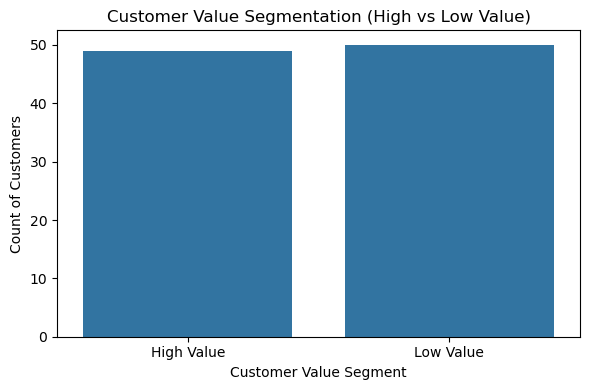

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(data=customer_summary, x="Value_Segment")
plt.title("Customer Value Segmentation (High vs Low Value)")
plt.xlabel("Customer Value Segment")
plt.ylabel("Count of Customers")
plt.tight_layout()
plt.show()


In [68]:
segment_summary = customer_summary.groupby('Value_Segment').agg({
    'Customer': 'count',
    'Sales': 'sum',
    'Profit': 'sum',
    'Transaction_Count': 'sum'
}).rename(columns={'Customer': 'Customer_Count'}).reset_index()

segment_summary['Avg_Profit_per_Customer'] = (
    segment_summary['Profit'] / segment_summary['Customer_Count']
)

print("SUMMARY CUSTOMER VALUE SEGMENTATION:")
display(segment_summary)
print("\n")

SUMMARY CUSTOMER VALUE SEGMENTATION:


,Value_Segment,Customer_Count,Sales,Profit,Transaction_Count,Avg_Profit_per_Customer
0,High Value,49,1.528635e+06,204994.5261,6110,4183.561757
1,Low Value,50,7.685663e+05,81402.4956,3884,1628.049912


# **Analisis Transaksi Profit Negatif**

In [69]:
negative_transactions = df_copy[df_copy['Profit'] < 0]

total_transactions = len(df_copy)
negative_count = len(negative_transactions)
negative_percentage = (negative_count / total_transactions) * 100
total_loss = negative_transactions['Profit'].sum()

print("STATISTIK TRANSAKSI PROFIT NEGATIF:")
print(f"Total Transaksi: {total_transactions:,}")
print(f"Transaksi dengan Profit Negatif: {negative_count:,} ({negative_percentage:.2f}%)")
print(f"Total Kerugian: ${total_loss:,.2f}")
print(f"Rata-rata Loss per Transaksi: ${total_loss/negative_count:,.2f}")


STATISTIK TRANSAKSI PROFIT NEGATIF:
Total Transaksi: 9,994
Transaksi dengan Profit Negatif: 1,871 (18.72%)
Total Kerugian: $-156,131.29
Rata-rata Loss per Transaksi: $-83.45


**Insight**

- Dari total 9.994 transaksi, terdapat 1.871 transaksi rugi (18.72%) sehingga hampir satu dari lima transaksi menghasilkan profit negatif.​

- Total kerugian kumulatif dari transaksi-transaksi ini mencapai sekitar $156K, dengan rata-rata loss sekitar $83 per transaksi, sehingga transaksi rugi merupakan kontributor signifikan terhadap penurunan profit perusahaan.

In [70]:
negative_by_product = negative_transactions.groupby('Product').agg({
    'Profit': ['sum', 'count', 'mean']
}).reset_index()

negative_by_product.columns = ['Product', 'Total_Loss', 'Loss_Count', 'Avg_Loss']
negative_by_product = negative_by_product.sort_values('Total_Loss')

print("PRODUK DENGAN TRANSAKSI RUGI:")
display(negative_by_product)
print("\n")

PRODUK DENGAN TRANSAKSI RUGI:


,Product,Total_Loss,Loss_Count,Avg_Loss
1,ContactMatcher,-70922.6447,816,-86.915006
0,Big Ol Database,-30118.6682,44,-684.515186
4,Marketing Suite,-12152.2060,109,-111.488128
3,FinanceHub,-9880.8413,235,-42.046133
6,OneView,-8629.6412,67,-128.800615
8,Site Analytics,-7530.6235,136,-55.372232
7,SaaS Connector Pack,-6490.9134,167,-38.867745
5,Marketing Suite - Gold,-6426.3038,161,-39.914930
10,Support,-3015.6219,33,-91.382482
2,Data Smasher,-930.6265,91,-10.226665


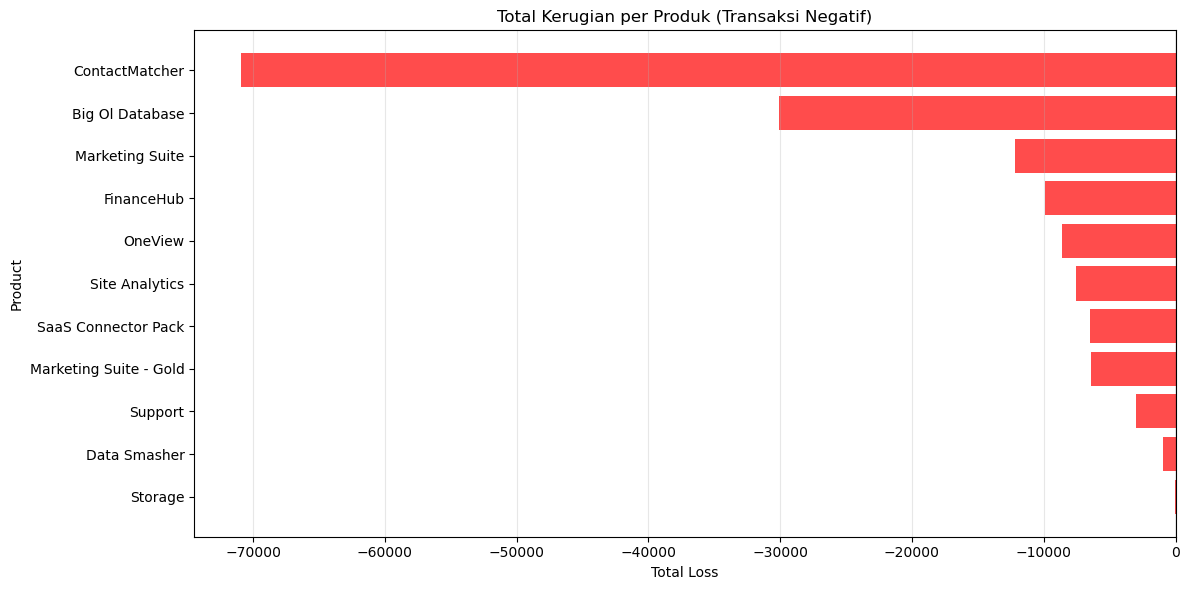

In [71]:
plt.figure(figsize=(12, 6))
plt.barh(negative_by_product['Product'], negative_by_product['Total_Loss'], color='red', alpha=0.7)
plt.xlabel('Total Loss')
plt.ylabel('Product')
plt.title('Total Kerugian per Produk (Transaksi Negatif)')
plt.gca().invert_yaxis()
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**

- Produk dengan total kerugian terbesar dari transaksi negatif adalah ContactMatcher (sekitar ‑70K), diikuti Big Ol Database (±‑30K) dan Marketing Suite (±‑12K), sehingga tiga produk ini menjadi kontributor utama loss perusahaan.​

- Produk lain seperti FinanceHub, OneView, Site Analytics, dan SaaS Connector Pack masing‑masing menambah kerugian di kisaran ‑7K hingga ‑9K, sementara Support, Data Smasher, dan Storage menyumbang loss yang relatif lebih kecil, sehingga fokus perbaikan sebaiknya diprioritaskan pada ContactMatcher, Big Ol Database, dan Marketing Suite terlebih dahulu

In [72]:
negative_by_region = negative_transactions.groupby('Region').agg({
    'Profit': ['sum', 'count', 'mean']
}).reset_index()

negative_by_region.columns = ['Region', 'Total_Loss', 'Loss_Count', 'Avg_Loss']
negative_by_region = negative_by_region.sort_values('Total_Loss')

print("KERUGIAN PER REGION (Transaksi Negatif):")
display(negative_by_region)

KERUGIAN PER REGION (Transaksi Negatif):


,Region,Total_Loss,Loss_Count,Avg_Loss
2,EMEA,-66471.8374,702,-94.689227
1,APJ,-57043.8543,751,-75.957196
0,AMER,-32615.5940,418,-78.027737


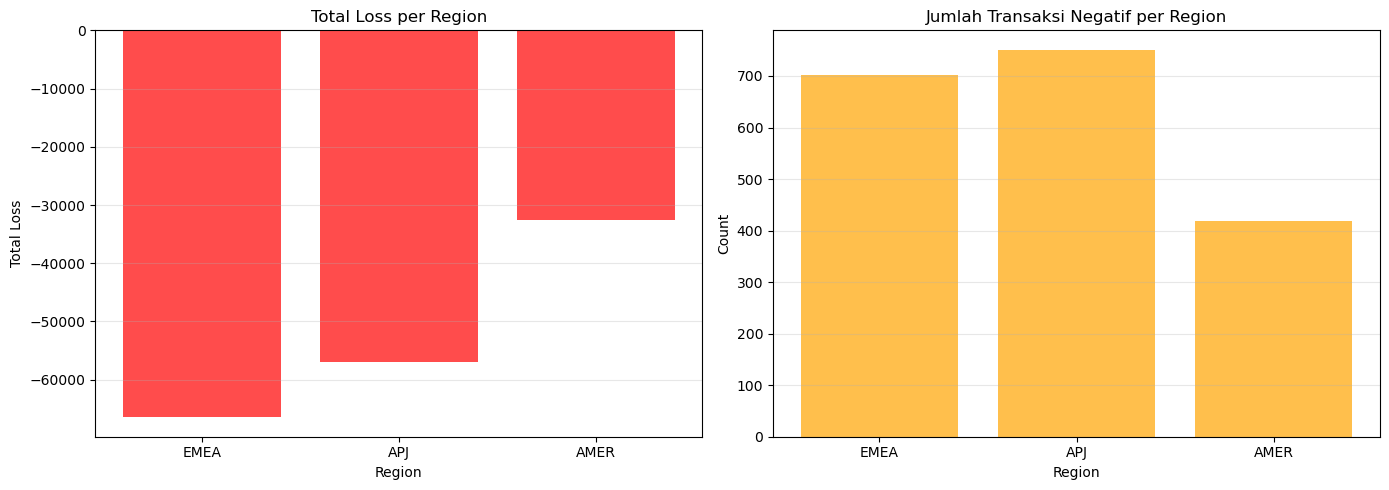

In [73]:
# Visualisasi loss per region
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total loss per region
axes[0].bar(negative_by_region['Region'], negative_by_region['Total_Loss'], color='red', alpha=0.7)
axes[0].set_title('Total Loss per Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Loss')
axes[0].grid(axis='y', alpha=0.3)

# Jumlah transaksi negatif per region
axes[1].bar(negative_by_region['Region'], negative_by_region['Loss_Count'], color='orange', alpha=0.7)
axes[1].set_title('Jumlah Transaksi Negatif per Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Insight**

- Total loss terbesar berasal dari APJ (sekitar ‑57K) dan EMEA (sekitar ‑66K), sedangkan AMER mengalami kerugian lebih kecil (sekitar ‑33K), sehingga APJ dan EMEA menjadi kontributor utama terhadap total transaksi rugi.​

- Namun dari sisi jumlah transaksi negatif, APJ memiliki count tertinggi (~750 transaksi), sedikit di atas EMEA (~700), sementara AMER hanya sekitar 420 transaksi; ini menunjukkan bahwa di APJ bukan hanya nilai loss yang besar, tetapi frekuensi transaksi ruginya juga paling banyak.

In [74]:
# Breakdown transaksi negatif per segment
negative_by_segment = negative_transactions.groupby('Segment').agg({
    'Profit': ['sum', 'count', 'mean']
}).reset_index()

negative_by_segment.columns = ['Segment', 'Total_Loss', 'Loss_Count', 'Avg_Loss']
negative_by_segment = negative_by_segment.sort_values('Total_Loss')

print("KERUGIAN PER CUSTOMER SEGMENT (Transaksi Negatif):")
display(negative_by_segment)

KERUGIAN PER CUSTOMER SEGMENT (Transaksi Negatif):


,Segment,Total_Loss,Loss_Count,Avg_Loss
1,SMB,-84945.7112,1003,-84.691636
2,Strategic,-44787.2076,556,-80.552532
0,Enterprise,-26398.3669,312,-84.610150


In [75]:
negative_discount_band = negative_transactions.groupby('Discount_Band', observed=False).agg({
    'Profit': ['sum', 'count']
}).reset_index()

negative_discount_band.columns = ['Discount_Band', 'Total_Loss', 'Loss_Count']

# Hitung persentase transaksi negatif per discount band
total_per_band = df_copy.groupby('Discount_Band', observed=False).size().reset_index(name='Total_Trans')
negative_discount_band = negative_discount_band.merge(total_per_band, on='Discount_Band')
negative_discount_band['Negative_Rate'] = (
    negative_discount_band['Loss_Count'] / negative_discount_band['Total_Trans'] * 100
)

print("HUBUNGAN DISKON dengan TRANSAKSI NEGATIF:")
display(negative_discount_band)

HUBUNGAN DISKON dengan TRANSAKSI NEGATIF:


,Discount_Band,Total_Loss,Loss_Count,Total_Trans,Negative_Rate
0,No Discount,0.0000,0,4798,0.000000
1,1-20%,-17616.0428,523,3803,13.752301
2,21-40%,-38956.6524,415,460,90.217391
3,41-60%,-28944.1944,215,215,100.000000
4,>60%,-70614.3961,718,718,100.000000


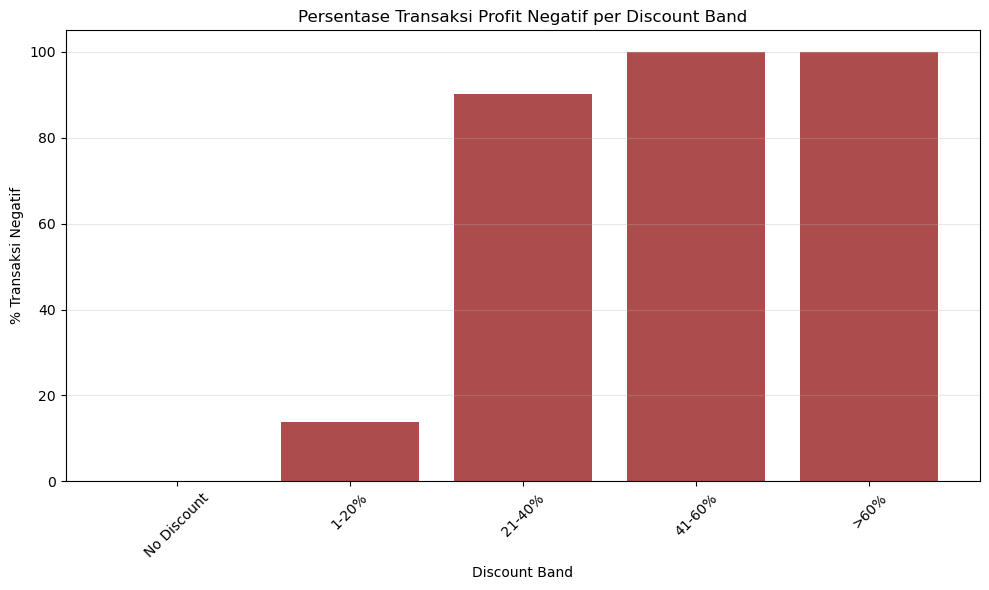

In [76]:
# Visualisasi persentase transaksi negatif per discount band
plt.figure(figsize=(10, 6))
plt.bar(negative_discount_band['Discount_Band'], 
        negative_discount_band['Negative_Rate'], 
        color='darkred', alpha=0.7)
plt.xlabel('Discount Band')
plt.ylabel('% Transaksi Negatif')
plt.title('Persentase Transaksi Profit Negatif per Discount Band')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**

- Pada band No Discount, hampir tidak ada transaksi dengan profit negatif (0%), menunjukkan transaksi tanpa diskon secara umum aman dan menguntungkan.​

- Pada band diskon 1–20%, hanya sekitar 14% transaksi yang rugi, sehingga diskon ringan ini masih relatif terkendali.​

- Mulai band 21–40%, persentase transaksi rugi melonjak menjadi sekitar 90%, lalu naik lagi menjadi 100% pada band 41–60% dan >60%, artinya hampir semua transaksi dengan diskon di atas 40% pasti menghasilkan kerugian.​

# **Kesimpulan**


- Ringkasan Utama
    - Penjualan tumbuh kuat selama 2020–2023, tetapi profit tidak naik seproporsional itu karena margin makin tertekan, terutama di periode dengan diskon agresif dan kombinasi produk yang kurang menguntungkan.​

- Diskon dan Profit
    - Diskon memiliki korelasi negatif cukup kuat dengan profit (sekitar -0,54), dan margin turun tajam saat diskon naik.​

    - Tanpa diskon margin sekitar 29,5%, diskon 1–20% masih sehat (±11–12%), tetapi mulai diskon 21–40% margin rata‑rata sudah negatif dan di atas 40% hampir semua transaksi rugi.​

- Produk dan Region
    - Produk seperti Alchemy, Site Analytics, Data Smasher, dan Support adalah kontributor profit utama dengan margin tinggi.​

    - Marketing Suite, Big Ol Database, dan ContactMatcher menyumbang kerugian besar, terutama ketika digabung dengan diskon tinggi dan di region tertentu.​

    - AMER dan EMEA memberikan margin dan kontribusi profit yang baik, sedangkan APJ memiliki margin sangat rendah dan banyak transaksi rugi, sehingga menjadi region paling bermasalah.​

- Segmen dan Pelanggan
    - SMB menyumbang porsi terbesar sales dan profit secara absolut, tetapi marginnya paling rendah; Enterprise dan Strategic lebih efisien dari sisi profit per rupiah sales.​

    - Sejumlah kecil pelanggan menyumbang porsi besar profit, sementara ada pelanggan dengan sales tinggi tetapi profit negatif, yang menunjukkan perlunya review kontrak dan kebijakan diskon per pelanggan.​

- Implikasi Bisnis
    - Masalah utama profitabilitas berasal dari diskon yang terlalu agresif, produk dengan margin rendah yang tetap didorong, region APJ yang lemah, dan fokus berlebihan pada volume tanpa cukup mempertimbangkan kualitas profit.​

    - Perbaikan dapat difokuskan pada pengetatan kebijakan diskon (terutama >20–40%), penguatan produk dan kombinasi region yang bermargin tinggi, serta evaluasi ulang produk dan pelanggan yang berulang kali merugi.

# **Tableau**

In [77]:
df_copy.to_csv("aws_saas_sales_clean.csv", index=False)